# Dimensionality Reduction using Auto Encoders
### Contents
- Dataset Preparation
- Training the Auto Encoders
- Performance Visualization

### Key Terminology
1. Input data: The original data that is fed into the auto-encoder.  

2. Encoding function: A neural network function that maps the input data to a lower-dimensional representation known as the latent space.
3. Latent space: A lower-dimensional representation of the input data that is learned by the auto-encoder.
4. Latent representation: The output of the encoding function, which is a lower-dimensional representation of the input data.
5. Decoding function: A neural network function that maps the latent representation back to the original data space to produce the reconstructed data.
6. Reconstructed data: The version of the input data that is produced by the auto-encoder through the encoding and decoding functions.
7. Reconstruction error: The difference between the input data and its reconstructed form. The goal of the auto-encoder is to minimize this error.
8. Weights: The parameters that control the encoding and decoding functions and that are learned by the auto-encoder during the training process.
9. Training process: The process by which the auto-encoder learns the weights to perform dimensionality reduction. This process typically involves backpropagating the reconstruction error and updating the weights using gradient descent.

In [1]:
from AutoEncoder import AutoEncoder

## Dataset

In [2]:
import pandas as pd

data = pd.read_csv('modified_data_load_forecasting_godishala_SS.csv', index_col=0)
data.head()

,T-1,T-2,T-3,T-4,T-24,T-48,T-72,T-96,DAY,SEASON,TEMP,HUMIDITY,T
0,2083.646729,455.976231,515.451392,654.226767,2260.056104,2236.756556,1828.915749,1967.388015,0.0,1.0,66.0,90.0,2062.165835
1,2062.165835,2083.646729,455.976231,515.451392,2260.056104,2236.756556,1828.915749,1967.388015,0.0,1.0,66.0,90.0,2062.165835
2,2062.165835,2062.165835,2083.646729,455.976231,2260.056104,2354.480586,1828.915749,1967.388015,0.0,1.0,66.0,90.0,2062.165835
3,2062.165835,2062.165835,2062.165835,2083.646729,2555.415800,2511.445958,1892.265507,2442.607331,0.0,1.0,80.0,40.0,2294.620910
4,2294.620910,2062.165835,2062.165835,2062.165835,2845.399210,2805.756031,2532.344883,2756.205522,0.0,1.0,80.0,40.0,2710.645657


## Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data)

## Splitting

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_scaled, test_size = 0.33, random_state = 100)
(df_train.shape, df_test.shape)

((5804, 13), (2860, 13))

In [5]:
X_train, X_test = df_train[:, :12], df_test[:, :12]
y_train, y_test = df_train[:, 12], df_test[:, 12]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5804, 12), (2860, 12), (5804,), (2860,))

In [6]:
cols = list(data.columns)
cols.remove('T')
X_train_df = pd.DataFrame(X_train, columns=cols)
X_test_df = pd.DataFrame(X_test, columns=cols)

In [7]:
X_train_df

,T-1,T-2,T-3,T-4,T-24,T-48,T-72,T-96,DAY,SEASON,TEMP,HUMIDITY
0,0.709662,0.752900,0.784014,0.784014,0.700733,0.735555,0.742894,0.760221,0.0,0.5,0.362069,0.772727
1,0.076012,0.105261,0.113269,0.237556,0.082371,0.095139,0.084376,0.113596,0.0,0.5,0.293103,0.840909
2,0.299057,0.273647,0.312002,0.312002,0.118569,0.124323,0.127331,0.126643,1.0,0.0,0.413793,0.875000
3,0.094569,0.626261,0.729389,0.665059,0.090061,0.105382,0.095258,0.101633,0.0,1.0,0.448276,0.681818
4,0.180738,0.174859,0.195675,0.226768,0.212708,0.228087,0.241174,0.239541,0.0,0.5,0.500000,0.840909
...,...,...,...,...,...,...,...,...,...,...,...,...
5799,0.667073,0.713969,0.724286,0.765673,0.583384,0.653662,0.711833,0.650910,0.0,0.5,0.396552,0.613636
5800,0.648510,0.457081,0.364608,0.240602,0.732866,0.782746,0.800964,0.796396,0.0,0.5,0.603448,0.204545
5801,0.065001,0.084865,0.101145,0.110914,0.065328,0.069198,0.069483,0.071081,1.0,0.5,0.293103,0.863636
5802,0.077892,0.094148,0.106896,0.113269,0.140072,0.199209,0.102564,0.090054,0.0,0.0,0.448276,0.840909


## Auto Encoders

- Auto-encoders are neural network models used for unsupervised learning.

- They are trained to reconstruct the input data by encoding and decoding.
- The encoding step compresses the input data into a lower-dimensional representation, known as the latent space.
- The decoding step reconstructs the original input from the latent representation.
- During training, the auto-encoder learns to identify and preserve important features in the input data.
- The learned compression can then be used for dimensionality reduction of new, unseen data.
- Applications of auto-encoders for dimensionality reduction include data visualization, feature extraction, and preprocessing for other machine learning tasks.

#### The Mathematical steps of the auto-encoder for dimensionality reduction are as follows:  
Consider a sample input data vector, x, with four features:  

$X = [X_{1}, X_{2}, X_{3}, X_{4}]$

The goal of the auto-encoder is to learn a lower-dimensional representation, $z$, of this data with, say, two features:

$Z = [Z_{1}, Z_{2}]$

This can be achieved using the encoding and decoding functions. The encoding function, $f(x)$, maps the input data, $X$, to the latent representation, $Z$:  

$Z = f(x;W) = [Z_{1}, Z_{2}] = [(W_{11}\times X_{1} + W_{12}\times X_{2} + W_{13} \times X_{3} + W_{14}\times X_{4}), (W_{21}\times X_{1} + W_{22} \times X_{2} + W_{23} \times X_{3} + W_{24} \times X_{4})]$

where $W$ is the weight matrix that connects the input data to the latent representation.  

The decoding function, $g(z)$, maps the latent representation back to the original data space:  
 
$X' = g(z;V) = [X_{1}', X_{2}', X_{3}', X_{4}'] = [(V_{11} \times Z_{1} + V_{12} \times Z_{2}), (V_{21} \times Z_{1} + V_{22} \times Z_{2}), (V_{31} \times Z_{1} + V_{32} \times Z_{2}), (V_{41} \times Z_{1} + V_{42} \times Z_{2})]$

where $V$ is the weight matrix that connects the latent representation to the reconstructed form of the input data.  

The objective of the auto-encoder is to minimize the reconstruction error between the input data, x, and its reconstructed form, $X'$:

$L = ||X - X'||^2 = (X_{1} - X_{1}')^2 + (X_{2} - X_{2}')^2 + (X_{3} - X_{3}')^2 + (X_{4} - X_{4}')^2$


The weights, $W$ and $V$, are learned during the training process by backpropagating the reconstruction error and updating the weights using gradient descent.  
During this process, the auto-encoder learns to identify and preserve the most important features of the input data in the latent representation, $Z$, effectively reducing its dimensionality.

when we train Auto Encoders, we do it differently as compared to regular Neural Networks.  
- because, Auto Encoders (for Dimensionality Reduction), they map their inputs to the inputs itself so that they can build a low-dimensional representations of the data.  
- where as in other neural networks, we usually map the inputs to the outputs.
- Changes in Code:
    - Regular Neural Networks:
    ```python
    history = model.fit(x=X_train, y=Y_train, epochs=50)
    ```

    - Auto Encoders (for Dimensionality Reduction):
    ```python
    history = model.fit(x=X_train, y=X_train, epochs=50)
    ```

In [8]:
auto_encoder = AutoEncoder(in_features=X_test_df.shape[1],
                           latent_space=7,
                           X_train=X_train_df,
                           X_test=X_test_df)

In [9]:
auto_encoder.build_model()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "AutoEncoder_LS_7_BS_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 12)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 11)                143       
                                                                 
 encoder_layer2 (Dense)      (None, 10)                120       
                                                                 
 encoder_layer3 (Dense)      (None, 9)                 99        
                                                                 
 encoder_layer4 (Dense)      (None, 8)                 80        
                                                                 
 latent_space (Dense)        (None, 7)                 63        
                                  

2023-02-02 22:45:06.447319: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-02 22:45:06.447414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
auto_encoder.fit(epochs=50)

Batch Size: 64
Epochs: 50
Epoch 1/50


2023-02-02 22:45:06.688067: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-02 22:45:06.947750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 6/10 [=================>............] - ETA: 0s - loss: 0.0990

2023-02-02 22:45:07.421427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 49ms/step - loss: 0.0996 - val_loss: 0.0982
Epoch 2/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0947 - val_loss: 0.0927
Epoch 3/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0921 - val_loss: 0.0871
Epoch 4/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0847 - val_loss: 0.0819
Epoch 5/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0790 - val_loss: 0.0768
Epoch 6/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0761 - val_loss: 0.0722
Epoch 7/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0708 - val_loss: 0.0682
Epoch 8/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0659 - val_loss: 0.0648
Epoch 9/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0613 - val_loss: 0.0620
Epoch 10/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0595 - val_loss: 0.0594
Epoch 11/50
10/10 [=

2023-02-02 22:45:21.532199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 0s 2ms/step


Low-Dimensional Representation of Train Data:


,X1,X2,X3,X4,X5,X6,X7
0,0.222994,0.198023,0.297866,0.0,0.224664,0.152751,0.241723
1,0.139477,1.005498,3.338110,0.0,2.991568,2.605868,0.333822
2,1.080224,1.641859,2.304812,0.0,1.378810,1.695395,0.000000
3,0.000000,0.474152,2.205912,0.0,2.079064,1.438849,0.497141
4,0.169340,0.936459,2.976741,0.0,2.647587,2.304111,0.313916
...,...,...,...,...,...,...,...
5799,0.148738,0.136532,0.340427,0.0,0.307593,0.178552,0.276991
5800,0.072931,0.101599,0.488092,0.0,0.500150,0.315677,0.305485
5801,0.806753,1.597682,3.028897,0.0,2.141328,2.151080,0.132433
5802,0.521620,1.304981,3.424963,0.0,2.880013,2.866334,0.139808


90/90 [==============================] - 0s 4ms/step


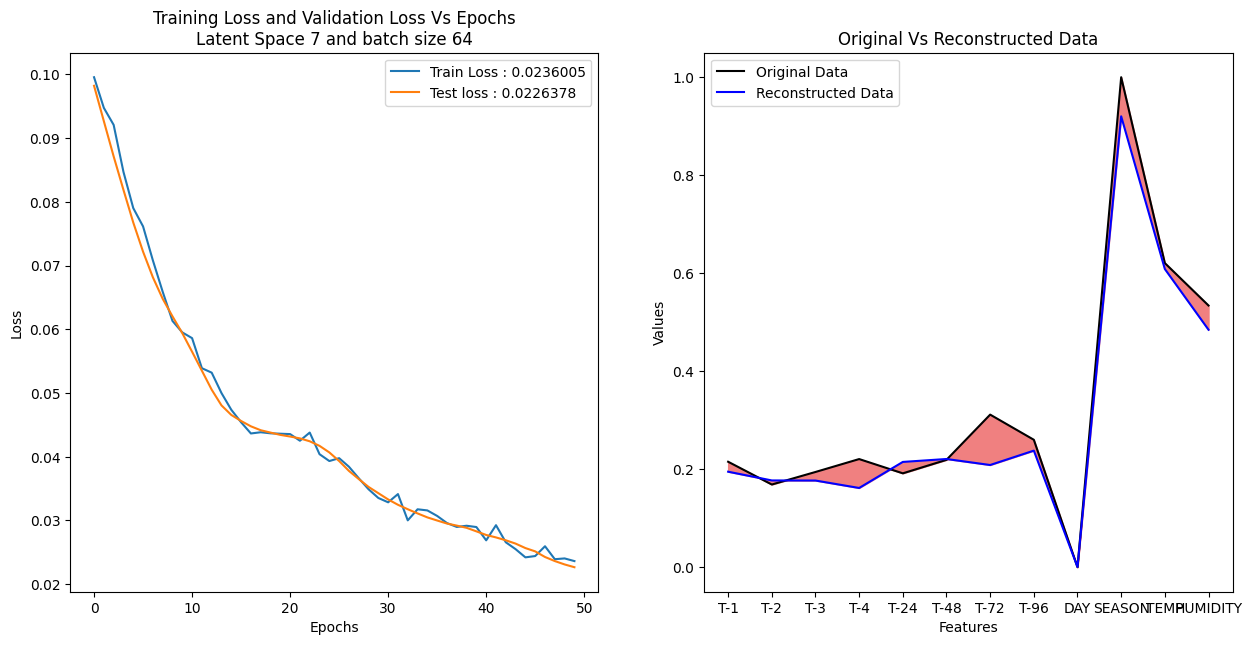

In [16]:
auto_encoder.visualize()